<h1> Regression </h1>
<p>In this module we will try to use linear regression to predict the mortality rate on given day using pollution parameters. <br>
<ul>
<li> Dependent Variable: Mortality Rate</li>
<li> Independent Variables: NO<sub>2</sub> level, Ozone level, PM2.5 level, PM10 level, mean temperature</li>
</ul>
</p>

<h2> Importing dependencies </h2>
<p>We import following Python libraries:</p>
<ol>
<li> Pandas: For reading and manipulating dataframes</li>
<li> Numpy: For numeric computation</li>
<li> Scikit-Learn: For training and testing linear regression model</li>
<li> Matplotlib: Plotting and visualisation</li>
<li> OS: Changing, getting paths</li>

</ol>

In [11]:
import pandas as pd
import numpy as np
import os
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
## setting path to data path
os.chdir(os.getcwd() + '\\Data')

<h2> Data Cleaning </h2>
<p> We clean the data in order to get only relevant features, (NO <sub>2</sub> levels, PM10 levels, PM2.5 levels, and mean temperature). The values that are not available are filled with the mean of the variable, in order to make it fit for computation </p>
<p> From the dataframe, the dependent (y) and independent (X) variables are obtained </p>


In [3]:
## importing data from csv
train = pd.read_csv('train.csv')

## removing Id, date, and region columns
train.drop(['Id', 'date', 'region'], axis = 1, inplace = True)

## removing NAs
for _ in train.columns.values:
    train[_].fillna(train[_].mean(), inplace = True)
    
## independent variables or features    
X = train.drop(['mortality_rate'], axis = 1)

## dependent variable
y = train.mortality_rate

<h2> Splitting data </h2>
<p> Before applying linear regression, the data is split into tests: train set (70 %) and test set (30 %) for the purpose of evaluation of model. Data is trained on the train set and its accuracy is measured as mean squared error on test set.

In [5]:
## taking a split of 70 : 30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

<h2> Applying Linear Regression </h2>

In [8]:
## Linear Regression from scikit-learn library
clf = LinearRegression(n_jobs = -1)

## fitting Linear regression curve
clf.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=-1, normalize=False)

<h2> Testing the accuracy of model </h2>
Mean squared error is used to test the accuracy of the model. It is defined as:
<img src = "https://cdn-images-1.medium.com/max/1600/1*20m_U-H6EIcxlN2k07Z7oQ.png", alt = "No image">

In [10]:
print('Mean squared error =', mean_squared_error(clf.predict(X_test), y_test))

Mean squared error = 0.06490234804869241


Text(0.5,1,'Predicted vs Actual values')

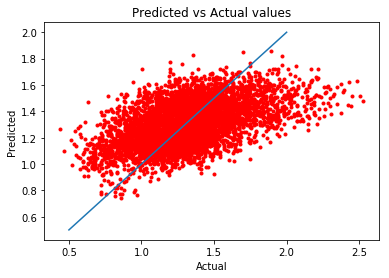

In [24]:
## predicted vs actual
plt.scatter(y_test, clf.predict(X_test), marker = '.', color = 'r')
x = np.linspace(0.5, 2)
y = x
plt.plot(x, y)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Predicted vs Actual values')

(array([3.671e+03, 8.750e+02, 3.900e+02, 2.010e+02, 1.370e+02, 8.700e+01,
        4.500e+01, 2.500e+01, 2.400e+01, 2.100e+01, 1.200e+01, 1.000e+01,
        9.000e+00, 3.000e+00, 4.000e+00, 2.000e+00, 0.000e+00, 3.000e+00,
        1.000e+00, 1.000e+00]),
 array([3.42008642e-10, 5.49423933e-02, 1.09884786e-01, 1.64827179e-01,
        2.19769572e-01, 2.74711965e-01, 3.29654358e-01, 3.84596751e-01,
        4.39539144e-01, 4.94481537e-01, 5.49423930e-01, 6.04366323e-01,
        6.59308716e-01, 7.14251109e-01, 7.69193502e-01, 8.24135895e-01,
        8.79078288e-01, 9.34020681e-01, 9.88963074e-01, 1.04390547e+00,
        1.09884786e+00]),
 <a list of 20 Patch objects>)

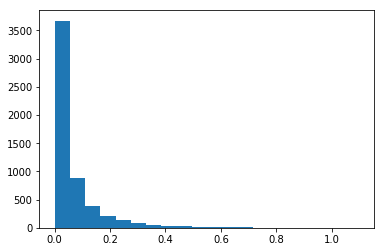

In [25]:
## distribution of squared error
plt.hist((clf.predict(X_test)-y_test)**2, bins = 20)

<h2> Percentage Error </h2>
<p> Percentage Error is defined as:
<img src = "http://astro.physics.uiowa.edu/ITU/_Media/percenterror.gif">

In [28]:
'''
Input : y_true: Actual result
        y_pred: Predicted Result
Output:  Percentage error given by above formula
'''

def percentage_error(y_true, y_pred): 
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

In [29]:
print('Percentage error =', percentage_error(y_test, clf.predict(X_test)))

Percentage error = 16.21706111632507


<h2> Conclusion </h2>
<p> There is a correlation between environmental factors and mortality rate. However, there is a large percentage error in predicting actual mortality rate. This is because it is affected by other factors as well. The pollution in this data does not drastically affect mortality rate as it is not severe. This is not true for Indian cities which have pollution levels way above the "safe" mark. Similar data can be collected for Indian cities to analyse the effect. As of now, no public dataset is available for Indian studies </p>